# Mass dependent cuts for pairAGraph

**Goal:** Sean has been showing how it seems like some of the cuts that we had in our analysis that weren't super helpful for S vs B may be having more of an impact for controlling the extrapolation.
 
I just wanted to take a second to see if the MDpT or MDR cuts for paragraph controlled the shape of the backgrounds in each of the regions. 

In [11]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib import gridspec
from preprocess import MDpT_cut,mcToYr

import os
os.sys.path.append('../code')
from plotting import SR_x, SR_y1, SR_y2, CR_x, CR_y1, CR_y2, SB_x, SB_y1, SB_y2
os.sys.path.append('../Flow-Models/')
from densityEstimate import *
from densityPlots import *


#from eventDisplays import pairAGraphDisplay

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
mc = 'mc16a'
prodTag = 'APR2020'
physicsSample = 'SMNR'

ntag = 3
nSelectedJets = 5

subDir = f'{physicsSample}_{mc}_PFlow-{prodTag}'

In [22]:
sm  = pd.concat([pd.read_hdf(f'../data/{subDir}-{nSelectedJets}jets/df_SM_2b_{t}_3b.h5') for t in ['even','odd']])

In [23]:
sm['abs_deta_hh'] = np.abs(sm.eta_h1 - sm.eta_h2)
sm['absCosThetaStar'] = np.abs(sm.cosThetaStar)

In [24]:
sig_mask = (sm.ntag >= 4) & (sm.m_h1>126-45) & (sm.m_h1<126+45) & (sm.m_h2>116-45) & (sm.m_h2<116+45)

In [25]:
np.sum(sm.MDpT)

176801

In [26]:
MDpT_cut(sm)

In [27]:
np.sum(sm.MDpT)

176801

In [28]:
smText = "$\mathbf{ATLAS}$ Simulation Internal\n"
smText += f"SMNR {mc}, APR2020 MNT prod\n"
smText += f"DL1r 77% WP, {mcToYr[mc]} triggers"

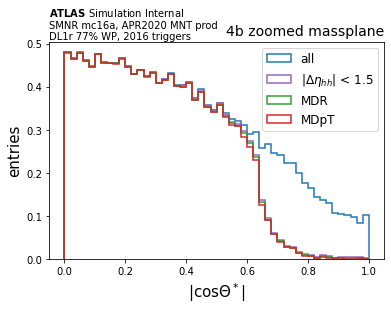

In [34]:
m = sig_mask
    
for mi,l,c in zip([sig_mask, (sm.abs_deta_hh < 1.5), sm.MDR, sm.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(sm.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,
             color=c,weights=sm.loc[m,'mc_sf'])
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('4b zoomed massplane',fontsize=14,loc='right')
plt.legend(fontsize=12,loc='upper right')

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{subDir}-5jets/absCosThetaStar_4b_zoomedMassplane.pdf')



In [33]:
m = sig_mask & (sm.kinematic_region==0)
    
for mi,l,c in zip([sig_mask& (sm.kinematic_region==0), (sm.abs_deta_hh < 1.5), sm.MDR, sm.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(sm.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,
             color=c,weights=sm.loc[m,'mc_sf'])
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('4b SR',fontsize=15,loc='right')
plt.legend(fontsize=12,loc='upper right')

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/{subDir}-5jets/absCosThetaStar_4b_SR.pdf')




Load in the 2b pairAGraph sample.

In [ ]:
subDir = 'data16_PFlow-FEB20-5jets'
tag = '_SM_2b_p_0.01'
seedTag = ''
prodTag = 'FEB20'
ntag = 2

lr, beta, N, L, H,h = 1e-3,1e-3,1,1,10,16
cols = ['log_pT_h1','log_pT_h2','eta_h2','eta_h1','log_dphi_hh']

# Load in the model
s = f'm_h1>{126-45} & m_h1<{126+45} & m_h2>{116-45} & m_h2<{116+45}'
d = data(5, 16, prodTag, tag, ntag, s)

mask = (d.df.abs_deta_hh < 1.5) 
d.mlPrepare(mask,cols,N=-1)

In [3]:
# for c in d.df.columns:
#     print(c)

Yey! Good news - I have *everything* I need to apply these cuts rn.

In [5]:
text = "$\mathbf{ATLAS}$ data Internal\n"
text += "2016 data FEB2020 MNT prod\n"
text += r"DL1r 77% WP, $\mathrm{\mathbb{P}}_{SM}$"

In [6]:
figDir = f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots'

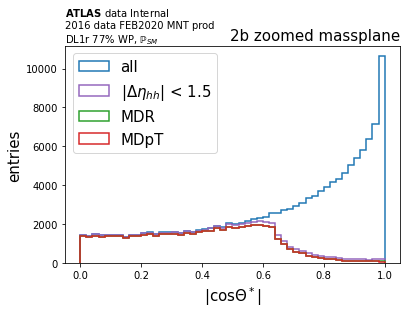

In [6]:
m = np.ones_like(d.df.index).astype(bool)
    
for mi,l,c in zip([np.ones_like(d.df.index).astype(bool), (d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,color=c)
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('2b zoomed massplane',fontsize=15,loc='right')
plt.legend(fontsize=15,loc='upper left')

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_zoomedMassplane.pdf')


Oooooh - v nice, and maybe I could make this a ratio w/r.t. $\Delta \eta_{hh}$??

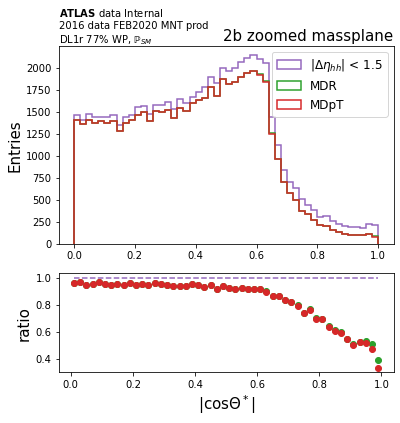

In [7]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],['C4','C2','C3']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b zoomed massplane',fontsize=15,loc='right')

plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_zoomedMassplane_ratio.pdf')

plt.show()

Yes - we *are* preferentially cutting out this high $|\cos \Theta^*|$ region!!

**Next:** How does it look in the SR?

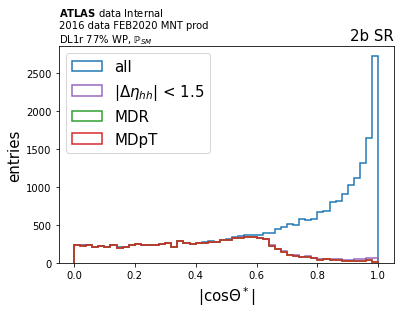

In [8]:
m = np.ones_like(d.df.index).astype(bool)
    
for mi,l,c in zip([(d.df.kinematic_region ==0),
                   (d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['all','$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],
                  ['C0','C4','C2','C3']):

    m = m & mi
    
    plt.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,lw=1.5,color=c)
    
plt.xlabel('$|\cos \Theta^*|$',fontsize=15)
plt.ylabel('entries',fontsize=15)

plt.title('2b SR',fontsize=15,loc='right')
plt.legend(fontsize=15,loc='upper left')

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_SR.pdf')



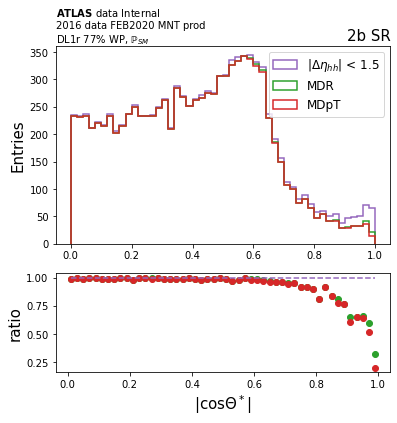

In [7]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.kinematic_region == 0) & (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDR, d.df.MDpT],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDR','MDpT'],['C4','C2','C3']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b SR',fontsize=15,loc='right')

#plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_SR_ratio.pdf')

plt.show()

Ok - it's a tiny bit noisy (b/c I downsampled the stats), but this is awesome, the stability is so much better in this region now

**Next Q:** Do we need both MDR and MDpT, or is just one sufficient?

**Plan:** Just invert the order that these cuts are being applied and check!


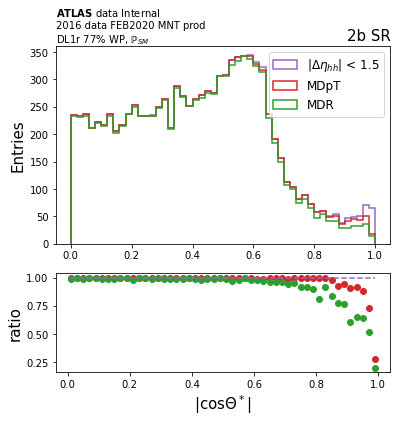

In [10]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


m = (d.df.kinematic_region == 0) & (d.df.abs_deta_hh < 1.5)
    
n0,e = np.histogram(d.df.loc[m,'absCosThetaStar'],50,(0,1))
xx = 0.5 * ( e[1:] + e[:-1] )
      
plt.plot(xx,np.ones_like(xx),color='C4',ls='--',lw=1.5)
    
for mi,l,c in zip([(d.df.abs_deta_hh < 1.5), d.df.MDpT, d.df.MDR],
                  ['$|\Delta \eta_{hh}|$ < 1.5','MDpT','MDR'],['C4','C3','C2']):

    m = m & mi
    
    n,_,_ = ax0.hist(d.df.loc[m,'absCosThetaStar'],50,(0,1),histtype='step',label=l,color=c,lw=1.5)
    
    if c != 'C4':
        plt.scatter(xx, n / n0, color=c)
    
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b SR',fontsize=15,loc='right')

plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_SR_ratio_MDpT_first.pdf')

plt.show()

**Message:** The MDR cuts are more aggressive than the MDpT cuts (I feel like this is consistent with intution that I've already built up w/ MDR +$\min\left(D_{hh}\right)$.

I'm not sure which cuts I'll want to apply before training, but at least I can check ipso facto what the interpolation looks like when I apply the model trained w/o these MD cuts to the model w/ these mass cuts and see which (or both) help the modelling more.

### Next: See how these cuts impact the interpolation model

In [11]:
nSeeds = 250
nPreds = 10
varTag = 'HC vars'

lr = .001
L, H = 5, 32
i = 0

colTag = '_'.join(cols)


In [12]:
reload=False

nb,r = 50,(0,1.75)

r5Seeds_hists_cs   = {}
r5Seeds_hists_m_hh = {}
r5Seeds_hists_deta = {}

df = d.df
mi = (d.df.abs_deta_hh < 1.5)
SR = (df.kinematic_region==0) & mi
nSeeds = 250

nEvts = d.X_SR.shape[0]
N = nEvts*nPreds

In [13]:
for seed in tqdm(range(nSeeds)):

    # Load in the R-NVP
    seedTag = f'_seed{seed}' if seed != 10 else ''
    ri = RealNVP(f'{subDir}{tag}_2b_detaCut{seedTag}', lr, beta, cols, 0, L, H,
                 load_model=True,modelBaseDir='../Flow-Models/models',debug=False)
    filename = f'{ri.modelDir}/df_SR.h5'
    key = f'n_seed{seed}'
    
    if reload:
        rpi = RealNVP_Plots(ri, save=False)

        dfi = rpi.pred_hh(d.X_SR, d.Y_SR, d.scalar, SR, df, nPreds=nPreds, cols=cols, plot=False)
        
        
        # Swap levels and save the seed
        dfi = dfi.swaplevel()
        idx = pd.MultiIndex.from_product([range(nEvts),[seed],range(nPreds)],
                                         names=['events','seeds','samples'])
        dfi.index = idx
        
        dfi.to_hdf(filename,key='df',format='table')
    else:
        dfi = pd.read_hdf(filename,key='df')
      
    # Calc the new vars 
    dfi['abs_deta_hh'] = np.abs(dfi.eta_h1-dfi.eta_h2)
    MDpT_cut(dfi)
    
    ms = [np.ones_like(dfi.index).astype(bool), 
          (df.loc[SR,'MDR'].values.reshape( -1,1) * np.ones((nEvts,nPreds)).astype(bool)).flatten(), 
          (df.loc[SR,'MDpT'].values.reshape(-1,1) * np.ones((nEvts,nPreds)).astype(bool)).flatten(), 
          ((df.loc[SR,'MDR'] & df.loc[SR,'MDpT']).values.reshape(-1,1) * np.ones((nEvts,nPreds)).astype(bool)).flatten(), 
          dfi.MDpT]
    for t, m in zip(['','_MDR','_MDpT','_MDcuts','_MDpT2'], ms):
        
        r5Seeds_hists_cs[key+t]   = np.histogram(dfi.loc[m,'absCosThetaStar'], nb, (0,1))[0] / nPreds
        r5Seeds_hists_m_hh[key+t] = np.histogram(dfi.loc[m,'m_hh'], nb, (200,1200))[0] / nPreds
        r5Seeds_hists_deta[key+t] = np.histogram(dfi.loc[m,'abs_deta_hh'], nb, r)[0] / nPreds
    
# And now w/ the appropriate masks!!
for t, m in zip(['','_MDR','_MDpT','_MDcuts'], [SR, df.MDR, df.MDpT, df.MDR&df.MDpT]):

    r5Seeds_hists_cs[f'n_2b{t}']   = np.histogram(df.loc[SR & m,'absCosThetaStar'], nb, (0,1))[0]
    r5Seeds_hists_m_hh[f'n_2b{t}'] = np.histogram(df.loc[SR & m,'m_hh'],           nb,(200,1200))[0]
    r5Seeds_hists_deta[f'n_2b{t}'] = np.histogram(df.loc[SR & m,'abs_deta_hh'],    nb,r) [0]
    

100%|██████████| 250/250 [03:43<00:00,  1.12it/s]


In [14]:
f'beta{beta:.0e}'

'beta1e-03'

Cool - let's look @ some plots!!

In [15]:
text = "$\mathbf{ATLAS}$ data Internal\n"
text += "2016 data FEB2020 MNT prod\n"
text += r"DL1r 77% WP, $\mathrm{\mathbb{P}}_{SM}$ w/ $|\Delta \eta_{hh}|$ < 1.5"

In [16]:
figDir_p01 = f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/rnvp_{colTag}_{L}_layers_H_{H}_lr_{lr}_{beta}_iter0/'

In [17]:
c0s = ['thistle', 'palegreen', 'lightsalmon', 'bisque']
c1s = ['darkviolet', 'green', 'C3', 'darkorange']

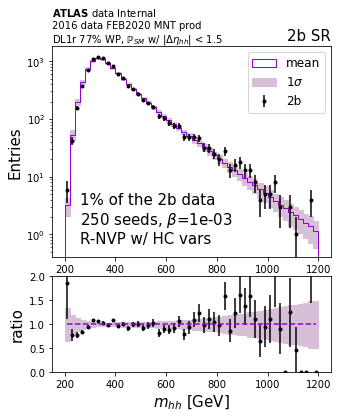

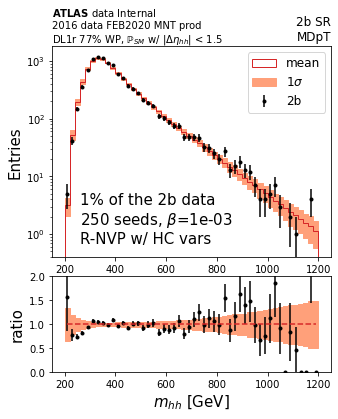

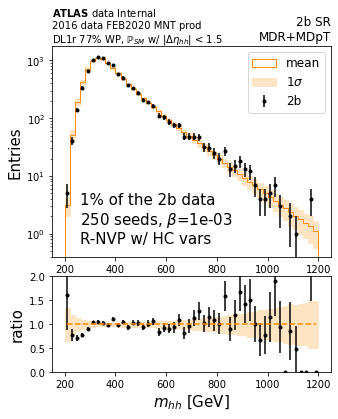

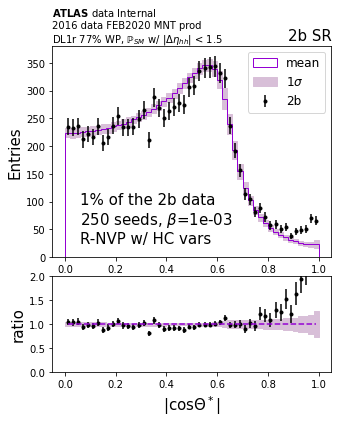

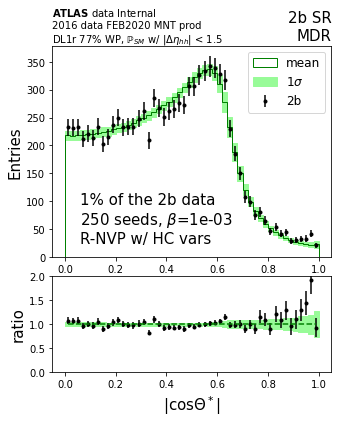

pred deta > 1.5: 1.96%


pred deta > 1.5: 1.96%


pred deta > 1.5: 1.96%


pred deta > 1.5: 1.96%


In [18]:
for histSeeds,ri,v,xlabel in zip([r5Seeds_hists_m_hh, r5Seeds_hists_cs, r5Seeds_hists_deta],
                                 [(200,1200), (0,1), r], ['m_hh','absCosThetaStar','abs_deta_hh'],
                                 ['$m_{hh}$ [GeV]','$|\cos \Theta^*|$','$|\Delta \eta_{hh}|$']):
    
    for ti,title,c0,c1 in zip(['','_MDR','_MDpT','_MDcuts','_MDpT2'], 
                              ['2b SR','2b SR\nMDR','2b SR\nMDpT','2b SR\nMDR+MDpT'],
                              c0s, c1s):
        
        # Automatically infer what the filename should be!
        filename = f'{figDir_p01}/{v}_SR{ti}_mean_1sigma_250seeds.pdf'
        
        marginalWithErrors(histSeeds,ti,nb,ri,xlabel,title,filename,
                           nSeeds,'n','n',text,varTag,c0,c1)


Ok - cool!! Honestly, I was a *little* skeptical how stable these marginals were with their nominal prediction.

I guess this could tell us that the interpolation really was stuggling to learn about these features, but a good comparison is just to overlay everything and *check*!!


In [19]:
def cfMarginalWithErrors(seeds_hists, tags=[], nb=50, r=(0,1.75), 
                         xlabel='|$\Delta \eta_{hh}|$',title='2b SR',
                         filename='',nSeeds=250,seed_key='n',key_2b='n',
                         text='',varTag='',c0s=[],c1s=[],p=0.01,beta=1e-3):
    '''
    Once we calculated this seeds_hists histogram, overlay the nominal entry 
    with the error bars.
    '''

    betaStr = r'$\beta$'
    
    # Make the figure
    fig = plt.figure(figsize=(11,6))
    gs = gridspec.GridSpec(3,2)
    ax1 = fig.add_subplot(gs[:2,0])
    ax2 = fig.add_subplot(gs[2:,0],sharex=ax1)

    for tag, c0, c1 in zip(tags, c0s, c1s):
    
        # Get the nominal values
        hists = np.vstack([seeds_hists[f'{seed_key}_seed{s}{tag}'] for s in range(nSeeds)])

        nom = np.mean(hists,axis=0)
        std = np.std( hists,axis=0)

        e = np.linspace(*r,nb+1)
        xx = 0.5 * ( e[1:] + e[:-1] )

        x_fine = np.hstack([r[0]]+[ee for ee in e[1:-1] for i in range(2)]+[r[1]])

        fine = np.hstack([nn for nn in nom for i in range(2)])
        std_fine = np.hstack([nn for nn in std for i in range(2)])


        # # Error bars
        ax1.fill_between(x_fine, fine+std_fine, fine-std_fine,
                         ec=c0,fc='w',zorder=0)
        ax2.fill_between(x_fine, (fine+std_fine)/fine, (fine-std_fine)/fine,
                         ec=c0,fc='w',zorder=0)

        # 2b
        l = 'nom' if tag == '' else tag[1:]
        n_2b = seeds_hists[f'{key_2b}_2b{tag}']
        ax1.plot(xx, n_2b,c1, label='2b'+tag.replace('_',' '), marker='.', lw=0)
        ax2.plot(xx, n_2b/nom,c1, marker='.', lw=0)
        
        # Central value
        ax1.hist(xx, nb,r,color=c1,histtype='step',weights=nom,label=l)
        
    if 'm_{hh}' in xlabel:
        ax1.set_yscale('log')
    
    ax2.plot(xx, np.ones_like(xx), color='k',linestyle='--')
    
    ax1.set_ylabel('Entries',fontsize=15)
    ax1.legend(fontsize=12,bbox_to_anchor=(1,1.03))
    ax1.set_title(title,loc='right',fontsize=15 if len(title) < 10 else 12)

    ax2.set_xlabel(xlabel, fontsize=15)
    ax2.set_ylim(0,2)
    ax2.set_ylabel('2b / pred',fontsize=15)

    ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)
    ax1.text(0.1, 0.05, f'{p*100:1.0f}% of the 2b data\n{nSeeds} seeds, {betaStr}={beta:1.0e}\nR-NVP w/ {varTag}',
             ha='left',va='bottom',transform=ax1.transAxes,fontsize=15)

    if len(filename) > 0:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()

In [20]:
tags = ['','_MDR','_MDpT','_MDcuts']

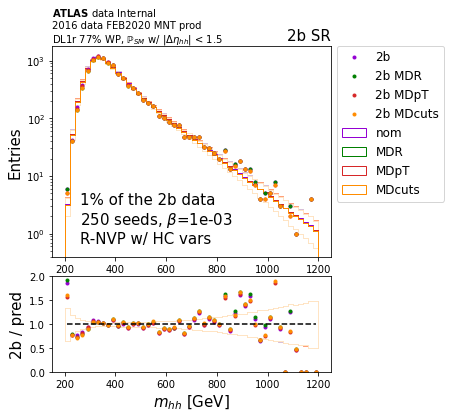

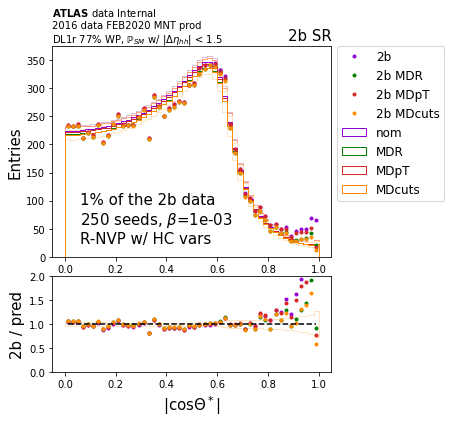

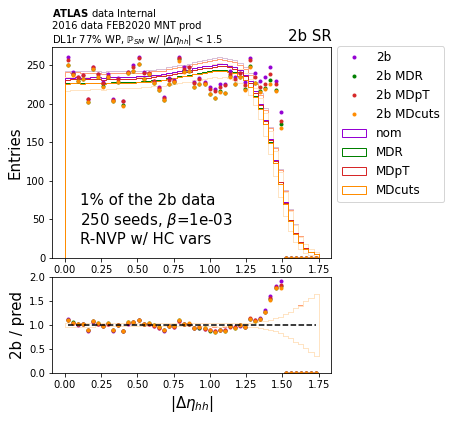

In [21]:
for histSeeds,ri,v,xlabel in zip([r5Seeds_hists_m_hh, r5Seeds_hists_cs, r5Seeds_hists_deta],
                                 [(200,1200), (0,1), r], ['m_hh','absCosThetaStar','abs_deta_hh'],
                                 ['$m_{hh}$ [GeV]','$|\cos \Theta^*|$','$|\Delta \eta_{hh}|$']):
    filename = f'{figDir_p01}/{v}_SR_various_MDcuts_mean_1sigma_250seeds.pdf'
    cfMarginalWithErrors(histSeeds,tags,nb,ri,xlabel,'2b SR',filename,
                         nSeeds,'n','n',text,varTag,c0s,c1s)

**Next: Let's compare the events removed by the MDpT cut *after* sampling versus the prediction on events that would have failed the MDpT cuts**

In [22]:
tag = '_MDpT'
hists = np.vstack([r5Seeds_hists_cs[f'n_seed{s}{tag}'] for s in range(nSeeds)])

md1 = np.mean(hists,axis=0)
sd1 = np.std( hists,axis=0)

n2b = r5Seeds_hists_cs[f'n_2b{tag}']

# Versus gen after?
tag = '_MDpT2'
hists = np.vstack([r5Seeds_hists_cs[f'n_seed{s}{tag}'] for s in range(nSeeds)])

md2 = np.mean(hists,axis=0)
sd2 = np.std( hists,axis=0)


In [23]:
r5Seeds_hists_cs[f'n_2b_MDpT']

array([235, 233, 236, 212, 222, 217, 236, 205, 216, 237, 254, 234, 234,
       234, 249, 265, 211, 288, 269, 251, 264, 271, 278, 275, 306, 309,
       336, 341, 342, 343, 329, 318, 236, 191, 156, 112, 104,  82,  88,
        72,  57,  59,  49,  50,  36,  42,  45,  44,  51,  18])

In [24]:
r5Seeds_hists_cs[f'n_2b_MDR']

array([233, 232, 233, 211, 221, 214, 234, 202, 215, 237, 250, 233, 234,
       234, 248, 262, 209, 285, 267, 251, 262, 266, 276, 273, 306, 306,
       326, 334, 342, 339, 328, 317, 230, 185, 150, 108,  99,  75,  81,
        65,  46,  54,  42,  44,  29,  30,  32,  33,  42,  21])

In [25]:
xx

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [26]:
fig = plt.figure(figsize = (6,6))
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.hist(xx,e,color='royalblue',histtype='step',lw=1.5,label='MDpT on 2b',weights=md1)
ax0.hist(xx,e,color='C3',histtype='step',lw=1.5,label='MDpT preds',weights=md2)
ax0.errorbar(xx,n2b,np.sqrt(n2b),color='k',lw=0,elinewidth=1.5,label='2b MDpT')

# _,ymax = ax0.get_ylim()
# ax0.set_ylim(0,1.3*ymax)

ax1.plot(xx,md1/n2b,color='C3',lw=0,marker='.') 
ax1.plot(xx,md2/n2b,color='royalblue',lw=0,marker='.') 
    
ax1.plot(xx,np.ones_like(xx),'k--')
    
ax1.set_xlabel('$|\cos \Theta^*|$',fontsize=15)
ax0.set_ylabel('Entries',fontsize=15)
ax1.set_ylabel('ratio',fontsize=15)

ax0.legend(fontsize=12,loc='upper right')

ax0.text(0,1,text,ha='left',va='bottom',transform=ax0.transAxes)
ax0.set_title('2b SR',fontsize=15,loc='right')

plt.savefig(f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut/intuitionPlots/absCosThetaStar_MDpT2_SR_ratio.pdf')

plt.show()

**Which part of the 5d space is getting eliminated this way?**

In [82]:
seed = 0
tag = '_SM_2b_p_0.01'

# Load in the R-NVP
seedTag = f'_seed{seed}' if seed != 10 else ''
ri = RealNVP(f'{subDir}{tag}_2b_detaCut{seedTag}', lr, beta, cols, 0, L, H,
             load_model=True,modelBaseDir='../Flow-Models/models',debug=False)
filename = f'{ri.modelDir}/df_SR.h5'
key = f'n_seed{seed}'

rpi = RealNVP_Plots(ri, save=False)

In [83]:
rpi.figDir = figDir_p01 = f'../Shape-Syst/figures/{subDir}_SM_2b_p_0.01_2b_detaCut_seed{seed}/rnvp_{colTag}_{L}_layers_H_{H}_lr_{lr}_{beta}_iter0/'
rpi.save=True

rpi.figDir

'../Shape-Syst/figures/data16_PFlow-FEB20-5jets_SM_2b_p_0.01_2b_detaCut_seed0/rnvp_log_pT_h1_log_pT_h2_eta_h2_eta_h1_log_dphi_hh_5_layers_H_32_lr_0.001_0.001_iter0/'

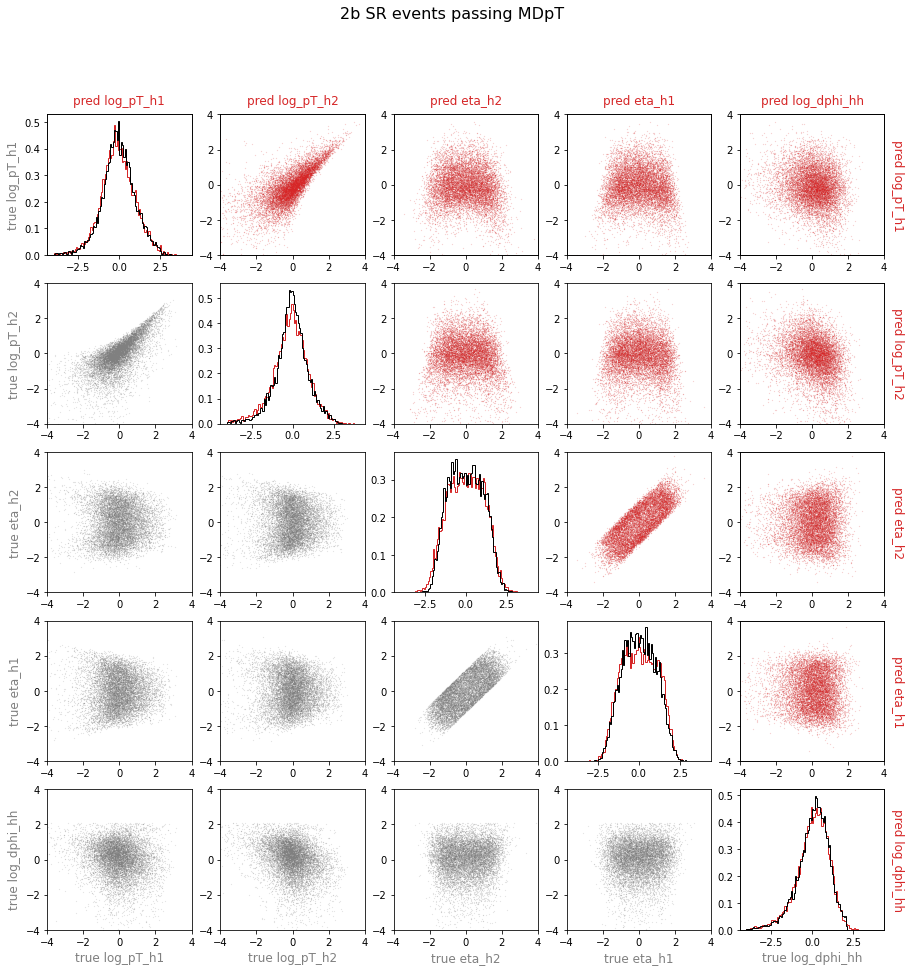

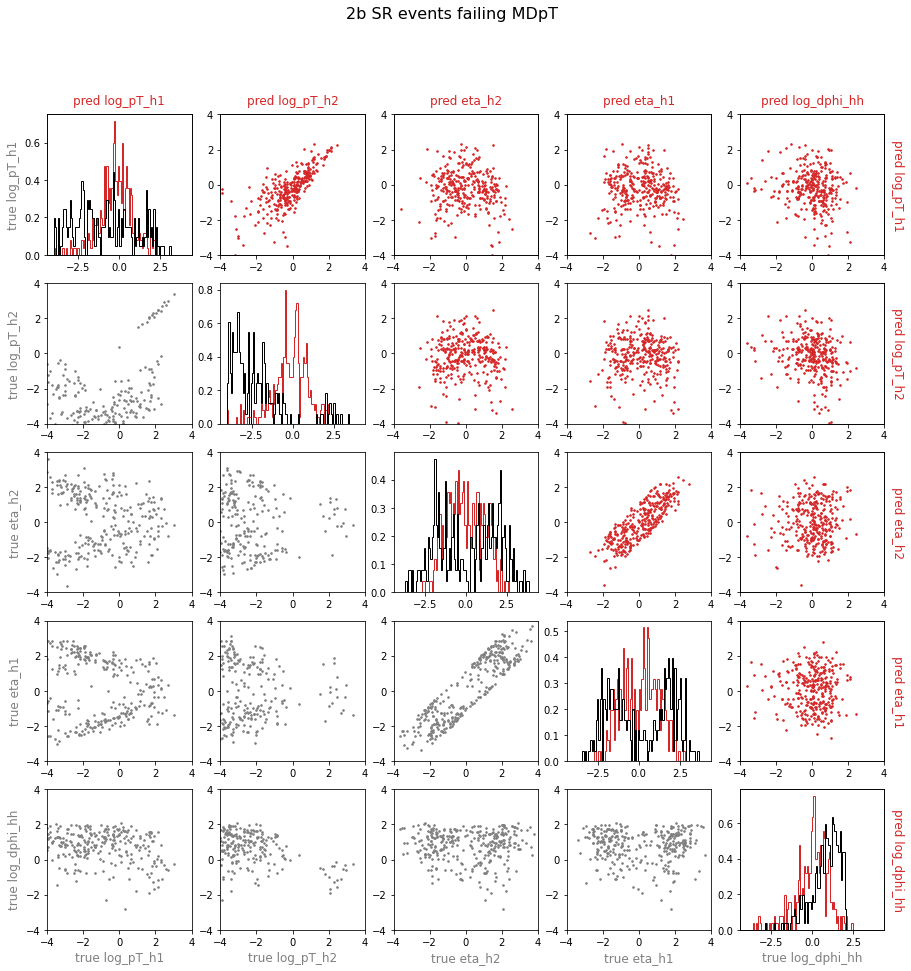

In [76]:
m = df.loc[SR,'MDpT'].values

rpi.plot_correlations(d.X_SR[m],  d.Y_SR[m], 'C3', mvars=cols,title='2b SR events passing MDpT',
                      tag='_pass_MDpT')

rpi.plot_correlations(d.X_SR[~m], d.Y_SR[~m],'C3', mvars=cols,title='2b SR events failing MDpT',
                      size=10,alpha=1,tag='_fail_MDpT')

- Actual data more diffuse for $p_T$ values, prediction more cnetral
- Data closer to cut boundaries
- And, it seems like we're predicting *more* back to back events.

**Look at the other variables**

(90,) (90,) (90,)
../Shape-Syst/figures/data16_PFlow-FEB20-5jets_SM_2b_p_0.01_2b_detaCut_seed0/rnvp_log_pT_h1_log_pT_h2_eta_h2_eta_h1_log_dphi_hh_5_layers_H_32_lr_0.001_0.001_iter0//dphi_hh_SR_fail_MDpT


../Flow-Models/densityPlots.py:610: RuntimeWarning: divide by zero encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')
../Flow-Models/densityPlots.py:610: RuntimeWarning: invalid value encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')
../Flow-Models/densityPlots.py:610: RuntimeWarning: divide by zero encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')
../Flow-Models/densityPlots.py:610: RuntimeWarning: invalid value encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')


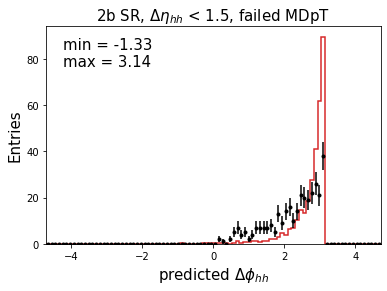

In [109]:
_ = rpi.pred_hh(d.X_SR[~m], d.Y_SR[~m], d.scalar, SR & (~df.MDpT), df, color='C3',
                title='2b SR, $\Delta \eta_{hh}$ < 1.5, failed MDpT',nPreds=nPreds, 
                cols=cols, plot=True,tag='_SR_fail_MDpT',leg2='upper left')

In [108]:
dfi = rpi.pred_hh(d.X_SR, d.Y_SR, d.scalar, SR, df, color='C3',nPreds=nPreds, cols=cols, 
                  title='2b SR, $\Delta \eta_{hh}$ < 1.5',plot=True,tag='_SR')

# Swap levels and save the seed
dfi = dfi.swaplevel()
idx = pd.MultiIndex.from_product([range(nEvts),[seed],range(nPreds)],
                                 names=['events','seeds','samples'])
dfi.index = idx

dfi.to_hdf(filename,key='df',format='table')

# Calc the new vars 
dfi['abs_deta_hh'] = np.abs(dfi.eta_h1-dfi.eta_h2)
MDpT_cut(dfi)


(90,) (90,) (90,)
../Shape-Syst/figures/data16_PFlow-FEB20-5jets_SM_2b_p_0.01_2b_detaCut_seed0/rnvp_log_pT_h1_log_pT_h2_eta_h2_eta_h1_log_dphi_hh_5_layers_H_32_lr_0.001_0.001_iter0//dphi_hh_SR


../Flow-Models/densityPlots.py:610: RuntimeWarning: divide by zero encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')
../Flow-Models/densityPlots.py:610: RuntimeWarning: invalid value encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')
../Flow-Models/densityPlots.py:610: RuntimeWarning: invalid value encountered in true_divide
  axb.plot(xx,np.ones_like(xx),'k--')


In [61]:
mi = (m.reshape( -1,1) * np.ones((nEvts,nPreds)).astype(bool)).flatten()

In [70]:
MDpT_cut(df)

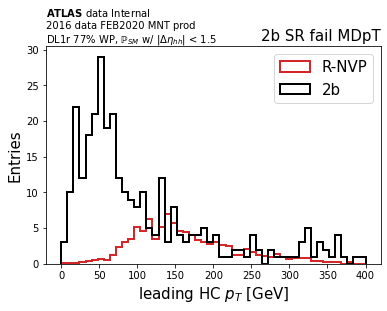

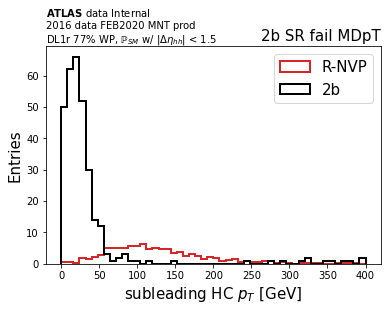

In [98]:
for c,xlabel in zip(['pt_hh','lead_HC_pt','subl_HC_pt'],
                ['$p_T^{hh}$ [GeV]','leading HC $p_T$ [GeV]','subleading HC $p_T$ [GeV]']):
    
    plt.figure()
    plt.hist(dfi.loc[~mi,c],nb,(0,400),color='C3',histtype='step',label='R-NVP',lw=2,
             weights=np.ones_like(dfi.loc[~mi,c])/nPreds)
    
    plt.hist(df.loc[SR,c].values[~m],nb,(0,400),color='k',histtype='step',label='2b',lw=2)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel('Entries',fontsize=15)
    plt.title('2b SR fail MDpT',loc='right',fontsize=15)
    plt.legend(loc='upper right',fontsize=15)
    
    ax = plt.gca()
    plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
    
    plt.savefig(f'{rpi.figDir}/{c}_SR_fail_MDpT.pdf',bbox_inches='tight')
    
    plt.show()

If I've *overestimated* both the $p_T^{hh}$ *and* the HC $p_T$s...

**Prediction:** I think these events getting cut out correspond to 4-jet events.

**Event displays**

**Plan:** Let's just look at *one* of the period A 2016 Ntuples, and maybe walk through some of this logic in the `pairAndProcess` function?


The only issue is, I'm really not sure which eventDisplay I'll want to use here... idk if I have one up-and-running for pairAGraph yet?

In [112]:
from analysis import fileDir
from preprocess import processDf
import uproot

In [250]:
periodA_file = '/u/ki/nhartman/gpfs/public/hh4b/data/user.mswiatlo.HH4B.periodA.data16..AB21.2.91-FEB20-0.pflow_vr_MiniNTuple.root/user.mswiatlo.20664130._000004.MiniNTuple.root'

In [251]:
f = uproot.open(periodA_file)
tree = f['XhhMiniNtuple']

In [252]:
jvars = ['pt','eta','phi','DL1r','is_DL1r_FixedCutBEff_77','Quantile_DL1r_Continuous','HadronConeExclTruthLabelID']
jdf = tree.pandas.df([f'resolvedJets_{v}' for v in jvars])

In [253]:
muon_vars = [f'muon_{v}' for v in ['pt','eta','phi','EnergyLoss','MeasEnergyLoss','ParamEnergyLoss']]
mdf = tree.pandas.df(muon_vars)

In [254]:
from preprocess import pairAndProcess

Let's just consider $\mathrm{\mathbb{P}}_{SM}$ trained on the even samples rn.

In [255]:
with open(f"configs/SM_2b_even.json", 'r') as varfile:
    GNNParams = json.load(varfile)

In [256]:
df_selJets = pairAndProcess(periodA_file, ntag=2, GNNParams=GNNParams,
                            cols=["run_number","event_number","mc_sf","ntag","ntag_all","njets",
                                  "kinematic_region","m_hh","pt_hh","X_wt","m_hh_cor",
                                  "pT_h1","eta_h1","phi_h1","m_h1","dRjj_h1","dPhi_h1",
                                  "pT_h2", "eta_h2", "phi_h2","m_h2","dRjj_h2","dPhi_h2",
                                  "pT_2", "pT_4", "eta_i", "dRjj_1", "dRjj_2",
                                  "cosThetaStar", "cosTheta1", "cosTheta2", "Phi", "Phi1",
                                  'j0_pt', 'j1_pt', 'j2_pt', 'j3_pt', 'j4_pt',
                                  'j0_eta','j1_eta','j2_eta','j3_eta','j4_eta',
                                  'j0_phi','j1_phi','j2_phi','j3_phi','j4_phi',
                                  'j0_E',  'j1_E',  'j2_E',  'j3_E',  'j4_E',
                                  'j0_Db', 'j1_Db', 'j2_Db', 'j3_Db', 'j4_Db',
                                  'ml_j0_Db','ml_j1_Db','ml_j2_Db','ml_j3_Db','ml_j4_Db',
                                  'idx_HC0_j0','idx_HC0_j1','idx_HC1_j0','idx_HC1_j1',
                                  "HT", "MDR",  "MDpT", "max_prob", "abs_deta_hh",
                                  "HT_all","lead_pt","lead_tag"],
                               dataSample='data16',dataProdTag=prodTag,year=2016,
                               save=False,truth=False)


dataSample data16
is_mc False

Opening /u/ki/nhartman/gpfs/public/hh4b/data/user.mswiatlo.HH4B.periodA.data16..AB21.2.91-FEB20-0.pflow_vr_MiniNTuple.root/user.mswiatlo.20664130._000004.MiniNTuple.root
Loading in the event df
Loading in the jet array
  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved

(array([93., 31.,  2.]),
 array([3.5, 4.5, 5.5, 6.5]),
 <a list of 3 Patch objects>)

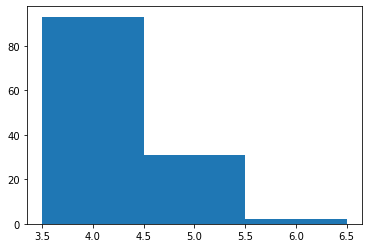

In [257]:
plt.hist(df_selJets.loc[(df_selJets.abs_deta_hh > 1.5)& (df_selJets.kinematic_region==0),'njets'],3,(3.5,6.5))

In [258]:
plt.hist(df_selJets.loc[~df_selJets.MDpT&(df_selJets.abs_deta_hh < 1.5)& (df_selJets.kinematic_region==0),'njets'],3,(3.5,6.5),'C3')

(array([0.66666667, 0.33333333, 0.        ]),
 array([3.5, 4.5, 5.5, 6.5]),
 <a list of 3 Patch objects>)

In [259]:
df_selJets.loc[(df_selJets.abs_deta_hh < 1.5)& (df_selJets.kinematic_region==0) & ~df_selJets.MDpT,'njets']

entry
10741    4
22129    4
33015    5
Name: njets, dtype: int64

In [260]:
df_selJets.loc[(df_selJets.abs_deta_hh < 1.5)& (df_selJets.kinematic_region==0) & ~df_selJets.MDpT]

run_number  event_number  mc_sf  ntag  ntag_all  njets  \
entry                                                           
10741      300279     142747199      1     2       2.0      4   
22129      300279     192643671      1     2       2.0      4   
33015      300279     166652925      1     2       2.0      5   

       kinematic_region         m_hh      pt_hh      X_wt  ...    MDR   MDpT  \
entry                                                      ...                 
10741                 0   284.118095  26.500979  2.585272  ...  False  False   
22129                 0  1186.082199  34.149180  8.499526  ...   True  False   
33015                 0   399.658802  20.454941  2.052390  ...  False  False   

       max_prob  abs_deta_hh      HT_all     lead_pt  lead_tag  \
entry                                                            
10741  0.411808     1.068193  222.648758   67.571838      True   
22129  1.000000     1.375843  976.220947  334.388763     False   
33015  0.332369     1.346664  312.149139   66.781815      True   

       HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25  \
entry                                                
10741                                         True   
22129                                         True   
33015                                         True   

       HLT_j100_2j55_bmv2c2060_split  HLT_j225_bmv2c2060_split  
entry                                                           
10741                          False                     False  
22129                           True                      True  
33015                          False                     False  

[3 rows x 78 columns]

Could this be why the trigger buckets made these events better?

Like are the events that failed these trigger buckets also would have failed our mass dependent cuts?

In [261]:
dmask = (df_selJets.abs_deta_hh < 1.5)& (df_selJets.kinematic_region==0) & ~df_selJets.MDpT

indices = df_selJets.loc[dmask].index

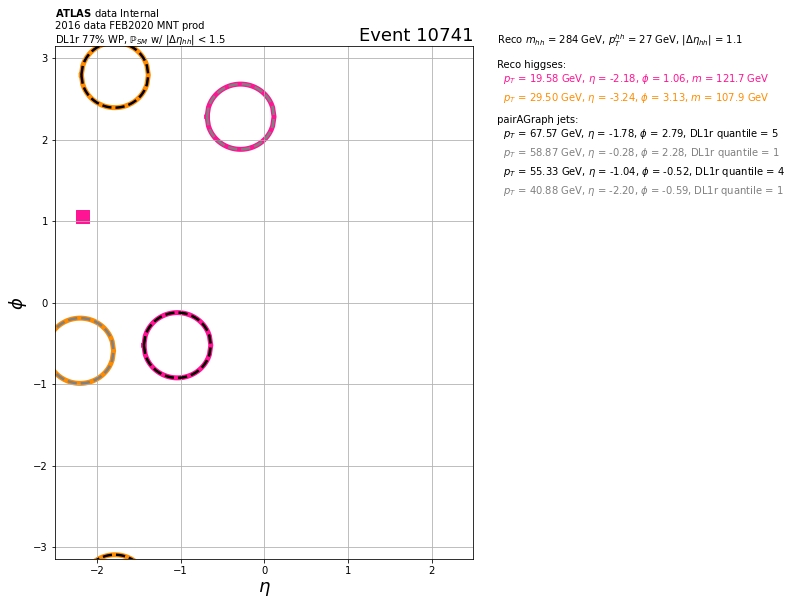

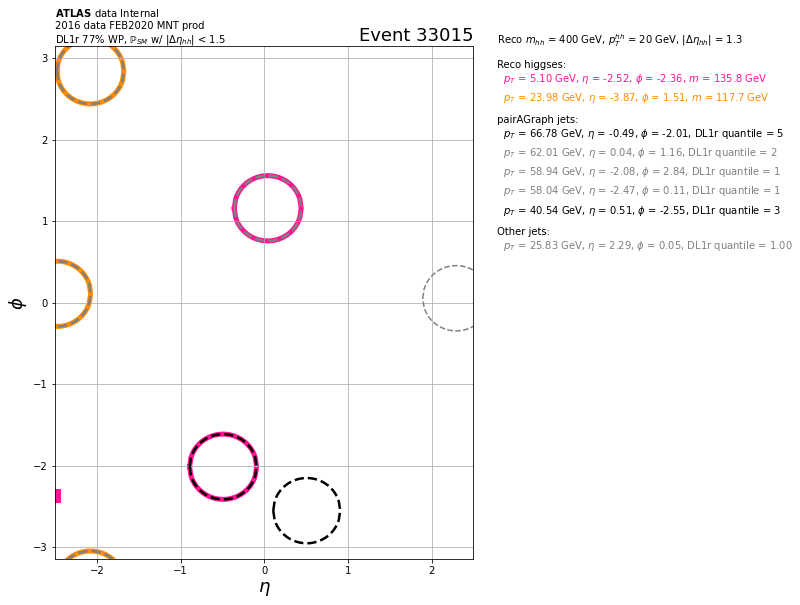

In [262]:
for ievt in indices:
    pairAGraphDisplay(ievt,df_selJets,jdf=jdf,mdf=mdf,text=text,
                      figDir=f'{figDir}/eventDisplays',tag='_SR_fail_MDpT')